<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
</center>
Автор материала: Data Scientist в Segmento Екатерина Демидова

# <center>Домашнее задание 2. <br> Визуальный анализ данных о публикациях на Хабрахабре</center>

In [1]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

## Загрузка и знакомство с данными

Для работы вам понадобятся данные из нашего учебного конкурса на kaggle [«Прогноз популярности статьи на Хабре»](https://inclass.kaggle.com/c/howpop-habrahabr-favs-lognorm). Файл **`howpop_train.csv`** уже лежит в нашем репозитории в каталоге **`data`**, но его можно скачать и с Kaggle.

In [2]:
df = pd.read_csv('../../data/howpop_train.csv')

In [3]:
df.shape

(134137, 17)

In [4]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


Избавимся сразу от переменных, названия которых заканчиваются на `_lognorm` (нужны для соревнования на Kaggle). Выберем их с помощью `filter()` и удалим `drop`-ом:

In [5]:
df.drop(filter(lambda c: c.endswith('_lognorm'), df.columns), 
        axis = 1,       # axis = 1: столбцы 
        inplace = True) # избавляет от необходимости сохранять датасет

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,NaN,NaN,NaN,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,NaN,NaN,NaN,445.0


In [7]:
df.describe(include = ['object', 'bool'] # бинарные и категориальные переменные
           ).T

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/71835/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [8]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context("notebook", font_scale = 1.5, 
                rc = { "figure.figsize" : (15, 5), "axes.titlesize" : 18 })

Столбец **`published`** (время публикации) содержит строки. Чтобы мы могли работать с этими данными как с датой/временем публикации, приведём их к типу `datetime`:

In [9]:
print(df.published.dtype)
df['published'] = pd.to_datetime(df.published, yearfirst = True)
print(df.published.dtype)

object
datetime64[ns]


Создадим несколько столбцов на основе данных о времени публикации:

In [25]:
df['year'] = [d.year for d in df.published]
df['month'] = [d.month for d in df.published]
df['dayOfMonth'] = [d.day for d in df.published]

df['dayofweek'] = [d.isoweekday() for d in df.published]
df['hour'] = [d.hour for d in df.published]

-----
Теперь Ваша очередь. В каждом пункте предлагается построить картинку и с ее помощью ответить на вопрос в [форме](https://docs.google.com/forms/d/e/1FAIpQLSf3b5OG8zX_nLQBQ-t20c6M5Auz-VUL-yxj8Fm9_o_XWDBTrg/viewform?c=0&w=1). Конечно, можно попытаться ответить на все вопросы только с Pandas, без картинок, но мы советуем Вам потренироваться строить (красивые) визуализации.   

## 1\. В каком месяце (и какого года) было больше всего публикаций?

* март 2016,
* март 2015,
* апрель 2015,
* апрель 2016.

In [26]:
df.head(3).T
df.groupby(['year', 'month']).size().sort_values()

year  month
2008  1         435
      2         496
      3         545
      4         597
      6         599
      5         635
      11        661
      7         674
      8         677
      10        712
2009  6         733
      5         755
      1         797
2008  12        798
2009  2         812
      4         840
      3         890
      7         891
2008  9         914
2009  9         955
      8         956
2010  11        990
      1        1010
      5        1012
2009  10       1021
2010  8        1029
2009  12       1049
2010  12       1055
      4        1068
2011  2        1072
               ... 
2014  9        1408
2012  3        1416
      10       1421
      11       1435
2011  6        1439
2013  11       1452
      10       1456
2014  11       1462
2016  9        1482
      10       1493
      6        1498
2015  1        1504
2014  10       1595
      12       1694
2016  1        1717
      5        1726
2015  2        1793
      5        1799
2016  2 

## 2\. Проанализируйте публикации в этом месяце

Выберите один или несколько вариантов:

* На графике не заметны какие-либо выбросы или аномалии,
* Один или несколько дней сильно выделяются из общей картины,
* На хабре _всегда_ больше статей, чем на гиктаймсе,
* По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей.

Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр `hue`; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

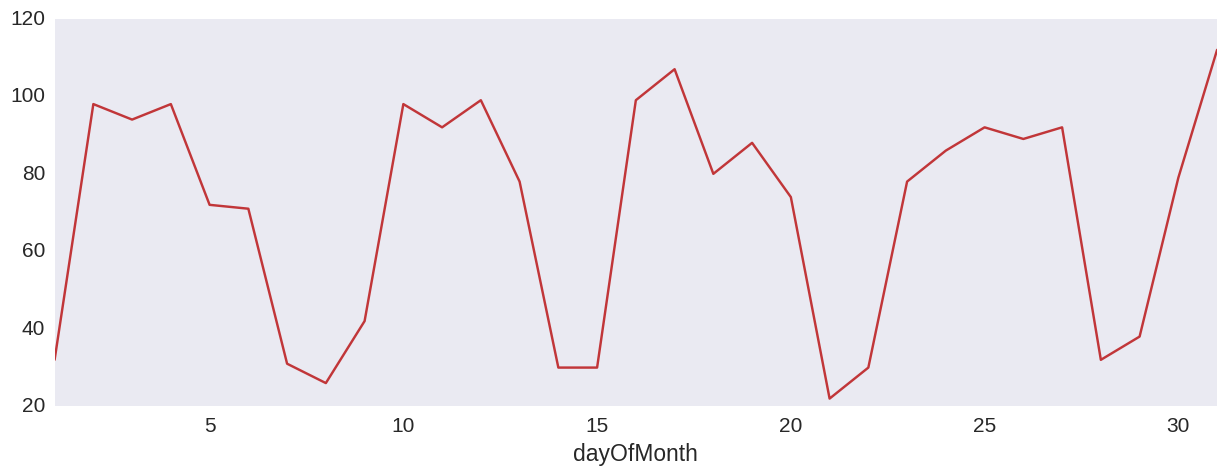

In [31]:
# 1 пункт да
df[(df['year'] == 2015) & (df['month'] == 3)].groupby('dayOfMonth').size().plot()

In [43]:
# 2 пункт нет
df[(df['year'] == 2015) & (df['month'] == 3)].groupby(['dayOfMonth']).size()

dayOfMonth
1      32
2      98
3      94
4      98
5      72
6      71
7      31
8      26
9      42
10     98
11     92
12     99
13     78
14     30
15     30
16     99
17    107
18     80
19     88
20     74
21     22
22     30
23     78
24     86
25     92
26     89
27     92
28     32
29     38
30     79
31    112
dtype: int64

In [130]:
# 4 пункт нет

df[(df['year'] == 2015) & (df['month'] == 3) & (df['dayofweek'] == 6)].groupby(['dayOfMonth', 'domain']).size()

dayOfMonth  domain      
7           geektimes.ru    11
            habrahabr.ru    20
14          geektimes.ru    17
            habrahabr.ru    13
21          geektimes.ru    14
            habrahabr.ru     8
28          geektimes.ru    15
            habrahabr.ru    17
dtype: int64

In [55]:
# 3 пункт (нет 14 день, 21 день)
df[(df['year'] == 2015) & (df['month'] == 3)].groupby(['dayOfMonth', 'domain']).size()

dayOfMonth  domain      
1           geektimes.ru     6
            habrahabr.ru    26
2           geektimes.ru    25
            habrahabr.ru    73
3           geektimes.ru    29
            habrahabr.ru    65
4           geektimes.ru    37
            habrahabr.ru    61
5           geektimes.ru    31
            habrahabr.ru    41
6           geektimes.ru    21
            habrahabr.ru    50
7           geektimes.ru    11
            habrahabr.ru    20
8           geektimes.ru     8
            habrahabr.ru    18
9           geektimes.ru    18
            habrahabr.ru    24
10          geektimes.ru    29
            habrahabr.ru    69
11          geektimes.ru    26
            habrahabr.ru    66
12          geektimes.ru    30
            habrahabr.ru    69
13          geektimes.ru    24
            habrahabr.ru    54
14          geektimes.ru    17
            habrahabr.ru    13
15          geektimes.ru    11
            habrahabr.ru    19
                            ..
17          ge

## 3\. Когда лучше всего публиковать статью?

* Больше всего просмотров набирают статьи, опубликованные в 12 часов дня;
* У опубликованных в 10 утра постов больше всего комментариев;
* Больше всего просмотров набирают статьи, опубликованные в 6 часов утра;
* Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера;
* На хабре дневные статьи комментируют чаще, чем вечерние.

In [128]:
# 1 нет
#df.groupby('hour')['views'].mean()

# 2 нет
#df.groupby('hour')['comments'].mean()

# 3 да
#df.groupby('hour')['views'].mean()

# 4 нет
#df.groupby('hour')['comments'].max()

# 5 нет
#df.groupby('hour')['comments'].mean()

hour
0     17546.982349
1     17717.709114
2     17328.690581
3     18370.017972
4     20678.389091
5     17218.894242
6     21354.310115
7     19093.953408
8     16014.419048
9     16906.059099
10    16580.889909
11    16331.186818
12    16209.416141
13    15822.606055
14    15773.203785
15    14739.224017
16    16583.150731
17    15814.881313
18    16731.210843
19    16926.284287
20    18134.614873
21    17605.819064
22    18365.387460
23    17631.345932
Name: views, dtype: float64

## 4\. Кого из топ-20 авторов чаще всего минусуют?

* @Mordatyj
* @Mithgol
* @alizar
* @ilya42

In [89]:
# alizar

#df.groupby('author')['votes_minus'].sum()
authors = df.groupby('author').size().to_dict()

#print(authors['@Mordatyj'])
#print(authors['@Mithgol'])
#print(authors['@alizar'])
#print(authors['@ilya42'])
#sorted(authors.items(), key=lambda x: x[1])[-20:]

# они все в топ-20
print(df.groupby('author')['votes_minus'].sum()['@Mordatyj'])
print(df.groupby('author')['votes_minus'].sum()['@Mithgol'])
print(df.groupby('author')['votes_minus'].sum()['@alizar'])
print(df.groupby('author')['votes_minus'].sum()['@ilya42'])

4057.0
11367.0
41734.0
3183.0


## 5\. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

In [102]:
# нет 

df.groupby('dayofweek')['hour'].describe(percentiles=[])
#df.groupby(['dayofweek', 'hour']).size()

dayofweek       
1          count    23636.000000
           mean        13.767939
           std          5.235694
           min          0.000000
           50%         14.000000
           max         23.000000
2          count    24575.000000
           mean        13.553652
           std          5.295366
           min          0.000000
           50%         14.000000
           max         23.000000
3          count    23660.000000
           mean        13.525232
           std          5.413304
           min          0.000000
           50%         14.000000
           max         23.000000
4          count    23082.000000
           mean        13.583832
           std          5.398140
           min          0.000000
           50%         14.000000
           max         23.000000
5          count    21292.000000
           mean        13.302320
           std          5.331644
           min          0.000000
           50%         14.000000
           max         23.